In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip3 install torch torchvision torchaudio

In [3]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb

--2023-12-03 12:25:09--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64/cuda-keyring_1.1-1_all.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4332 (4.2K) [application/x-deb]
Saving to: ‘cuda-keyring_1.1-1_all.deb’

cuda-keyring_1.1-1_ 100%[===================>]   4.23K  --.-KB/s    in 0s      

2023-12-03 12:25:09 (254 MB/s) - ‘cuda-keyring_1.1-1_all.deb’ saved [4332/4332]



In [4]:
!sudo dpkg -i cuda-keyring_1.1-1_all.deb

(Reading database ... 114840 files and directories currently installed.)
Preparing to unpack cuda-keyring_1.1-1_all.deb ...
Unpacking cuda-keyring (1.1-1) over (1.1-1) ...
Setting up cuda-keyring (1.1-1) ...


In [5]:
!sudo apt-get update

Hit:1 http://packages.cloud.google.com/apt gcsfuse-focal InRelease
Get:2 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Get:3 https://packages.cloud.google.com/apt google-fast-socket InRelease [5015 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]      
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease                       
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]      
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1581 B]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]      
Get:9 https://packages.cloud.google.com/apt cloud-sdk/main amd64 Packages [553 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [632 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Package

In [6]:
#!sudo apt install python3-pip

In [7]:
!sudo apt-get -y install cuda-toolkit-12-3

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-toolkit-12-2-config-common libcublas-12-2
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  cuda-cccl-12-3 cuda-command-line-tools-12-3 cuda-compiler-12-3 cuda-crt-12-3
  cuda-cudart-12-3 cuda-cudart-dev-12-3 cuda-cuobjdump-12-3 cuda-cupti-12-3
  cuda-cupti-dev-12-3 cuda-cuxxfilt-12-3 cuda-documentation-12-3
  cuda-driver-dev-12-3 cuda-gdb-12-3 cuda-libraries-12-3
  cuda-libraries-dev-12-3 cuda-nsight-12-3 cuda-nsight-compute-12-3
  cuda-nsight-systems-12-3 cuda-nvcc-12-3 cuda-nvdisasm-12-3
  cuda-nvml-dev-12-3 cuda-nvprof-12-3 cuda-nvprune-12-3 cuda-nvrtc-12-3
  cuda-nvrtc-dev-12-3 cuda-nvtx-12-3 cuda-nvvm-12-3 cuda-nvvp-12-3
  cuda-opencl-12-3 cuda-opencl-dev-12-3 cuda-profiler-api-12-3
  cuda-sanitizer-12-3 cuda-toolkit-12-3-config-common cuda-tools-12-3
 

In [8]:
import torch
torch.cuda.is_available()

True

In [9]:
#build with MONAI C++/CUDA extensions:
!BUILD_MONAI=1 pip install --no-build-isolation git+https://github.com/Project-MONAI/MONAI#egg=monai

  Cloning https://github.com/Project-MONAI/MONAI to /tmp/pip-install-dbcnol16/monai_c7d0daa0608d4f43ac147b1821914a84
  Running command git clone --filter=blob:none --quiet https://github.com/Project-MONAI/MONAI /tmp/pip-install-dbcnol16/monai_c7d0daa0608d4f43ac147b1821914a84
  Resolved https://github.com/Project-MONAI/MONAI to commit 962aa3cd32c2444affbb75e7c1bc0a1763d85bc3
  Preparing metadata (pyproject.toml) ... done
  Created wheel for monai: filename=monai-1.3.0+39.g962aa3cd-cp310-cp310-linux_x86_64.whl size=10353897 sha256=4d3537f0e5e2a5ada5d3e39ba42620979a02d5c56d3dc8ff154fd1638c6bd546
  Stored in directory: /tmp/pip-ephem-wheel-cache-lbk5vz11/wheels/ae/df/85/e1529c65c7b6d24f94fb29018f2e6a19809d416ee64044d71f
Successfully built monai


In [10]:
#Validating the install
!python -c "import monai; monai.config.print_config()"

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
MONAI version: 1.3.0+39.g962aa3cd
Numpy version: 1.24.3
Pytorch version: 2.0.0
MONAI flags: HAS_EXT = True, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 962aa3cd32c2444affbb75e7c1bc0a1763d85bc3
MONAI __file__: /opt/conda/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.13
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.21.0
scipy version: 1.7.3
Pillow version: 9.5.0
Tensorboard version: 2.13.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.15.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.3
pandas version: 2.1.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
tran

In [11]:
#install MONAI Generative Models
!git clone https://github.com/Project-MONAI/GenerativeModels.git

Cloning into 'GenerativeModels'...
remote: Enumerating objects: 3660, done.
remote: Counting objects: 100% (1104/1104), done.
remote: Compressing objects: 100% (531/531), done.
remote: Total 3660 (delta 775), reused 775 (delta 569), pack-reused 2556
Receiving objects: 100% (3660/3660), 21.31 MiB | 28.37 MiB/s, done.
Resolving deltas: 100% (2174/2174), done.


In [12]:
!wget https://github.com/Project-MONAI/MONAI/blob/dev/setup.py

--2023-12-03 12:38:00--  https://github.com/Project-MONAI/MONAI/blob/dev/setup.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34366 (34K) [text/plain]
Saving to: ‘setup.py’

setup.py            100%[===================>]  33.56K  --.-KB/s    in 0.02s   

2023-12-03 12:38:01 (1.32 MB/s) - ‘setup.py’ saved [34366/34366]



In [13]:
!cd GenerativeModels/
!python setup.py install

Traceback (most recent call last):
  File "/kaggle/working/setup.py", line 1, in <module>
    {"payload":{"allShortcutsEnabled":false,"fileTree":{"":{"items":[{"name":".github","path":".github","contentType":"directory"},{"name":"docs","path":"docs","contentType":"directory"},{"name":"monai","path":"monai","contentType":"directory"},{"name":"tests","path":"tests","contentType":"directory"},{"name":".clang-format","path":".clang-format","contentType":"file"},{"name":".deepsource.toml","path":".deepsource.toml","contentType":"file"},{"name":".dockerignore","path":".dockerignore","contentType":"file"},{"name":".gitattributes","path":".gitattributes","contentType":"file"},{"name":".gitignore","path":".gitignore","contentType":"file"},{"name":".pre-commit-config.yaml","path":".pre-commit-config.yaml","contentType":"file"},{"name":".readthedocs.yml","path":".readthedocs.yml","contentType":"file"},{"name":"CHANGELOG.md","path":"CHANGELOG.md","contentType":"file"},{"name":"CITATION.cff","path"

In [14]:
!pip install lpips
!pip install monai-generative==0.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.2 MB/s eta 0:00:00
  Obtaining dependency information for monai-generative==0.2.2 from https://files.pythonhosted.org/packages/be/7d/eb5b5f9813646f3864f93c61b29550f3a14b06383b79f2f327cc71540cae/monai_generative-0.2.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.3/140.3 kB 1.8 MB/s eta 0:00:00a 0:00:01


In [15]:
#Setup environment
!python -c "import monai" || pip install -q "monai-weekly[tqdm]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
#Setup imports
import os
import tempfile
import shutil
import time


import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.nn import L1Loss, CrossEntropyLoss
import torch.nn.functional as F
from monai import transforms
from monai.apps import MedNISTDataset
from monai.config import print_config
from monai.data import DataLoader, Dataset
from monai.utils import first, set_determinism
from tqdm import tqdm
from ignite.utils import convert_tensor

from generative.inferers import VQVAETransformerInferer
from generative.networks.nets import VQVAE, DecoderOnlyTransformer
from generative.utils.ordering import Ordering
from generative.utils.enums import OrderingType

print_config()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


MONAI version: 1.3.0+39.g962aa3cd
Numpy version: 1.24.3
Pytorch version: 2.0.0
MONAI flags: HAS_EXT = True, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 962aa3cd32c2444affbb75e7c1bc0a1763d85bc3
MONAI __file__: /opt/conda/lib/python3.10/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.13
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.1.0
scikit-image version: 0.21.0
scipy version: 1.7.3
Pillow version: 9.5.0
Tensorboard version: 2.13.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.15.1
tqdm version: 4.66.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.3
pandas version: 2.1.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: 4.35.0
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
   

In [17]:
# for reproducibility purposes set a seed
set_determinism(42)

In [18]:
#Setup a data directory and download dataset
directory = os.environ.get("MONAI_DATA_DIRECTORY")
root_dir = tempfile.mkdtemp() if directory is None else directory
print(root_dir)

/tmp/tmpl72kvv6y


In [19]:
#Download training data
train_data = MedNISTDataset(root_dir=root_dir, section="training", download=True, seed=0)
train_datalist = [{"image": item["image"]} for item in train_data.data if item["class_name"] == "HeadCT"]
image_size = 64
train_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.ScaleIntensityRanged(keys=["image"], a_min=0.0, a_max=255.0, b_min=0.0, b_max=1.0, clip=True),
        transforms.RandAffined(
            keys=["image"],
            rotate_range=[(-np.pi / 36, np.pi / 36), (-np.pi / 36, np.pi / 36)],
            translate_range=[(-1, 1), (-1, 1)],
            scale_range=[(-0.05, 0.05), (-0.05, 0.05)],
            spatial_size=[image_size, image_size],
            padding_mode="zeros",
            prob=0.5,
        ),
    ]
)
train_ds = Dataset(data=train_datalist, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=128, shuffle=True, num_workers=4, persistent_workers=True)

MedNIST.tar.gz: 59.0MB [00:00, 109MB/s]                             

2023-12-03 12:39:25,013 - INFO - Downloaded: /tmp/tmpl72kvv6y/MedNIST.tar.gz


2023-12-03 12:39:25,123 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-12-03 12:39:25,124 - INFO - Writing into directory: /tmp/tmpl72kvv6y.


Loading dataset: 100%|██████████| 47164/47164 [00:34<00:00, 1376.89it/s]


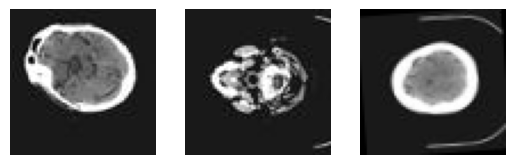

In [20]:
#Visualse some examples from the dataset
# Plot 3 examples from the training set
check_data = first(train_loader)
fig, ax = plt.subplots(nrows=1, ncols=3)
for image_n in range(3):
    ax[image_n].imshow(check_data["image"][image_n, 0, :, :], cmap="gray")
    ax[image_n].axis("off")

In [21]:
#Download Validation Data
val_data = MedNISTDataset(root_dir=root_dir, section="validation", download=True, seed=0)
val_datalist = [{"image": item["image"]} for item in val_data.data if item["class_name"] == "HeadCT"]
val_transforms = transforms.Compose(
    [
        transforms.LoadImaged(keys=["image"]),
        transforms.EnsureChannelFirstd(keys=["image"]),
        transforms.ScaleIntensityRanged(keys=["image"], a_min=0.0, a_max=255.0, b_min=0.0, b_max=1.0, clip=True),
    ]
)
val_ds = Dataset(data=val_datalist, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=128, shuffle=True, num_workers=4, persistent_workers=True)

2023-12-03 12:40:15,433 - INFO - Verified 'MedNIST.tar.gz', md5: 0bc7306e7427e00ad1c5526a6677552d.
2023-12-03 12:40:15,435 - INFO - File exists: /tmp/tmpl72kvv6y/MedNIST.tar.gz, skipped downloading.
2023-12-03 12:40:15,437 - INFO - Non-empty folder exists in /tmp/tmpl72kvv6y/MedNIST, skipped extracting.


Loading dataset: 100%|██████████| 5895/5895 [00:04<00:00, 1452.39it/s]


In [22]:
#Define network, optimizer and losses
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device}")
vqvae_model = VQVAE(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    num_res_layers=2,
    downsample_parameters=((2, 4, 1, 1), (2, 4, 1, 1)),
    upsample_parameters=((2, 4, 1, 1, 0), (2, 4, 1, 1, 0)),
    num_channels=(256, 256),
    num_res_channels=(256, 256),
    num_embeddings=256,
    embedding_dim=32,
)
vqvae_model = vqvae_model.to(device)

Using cuda


In [23]:
optimizer = torch.optim.Adam(params=vqvae_model.parameters(), lr=1e-4)
l1_loss = L1Loss()

In [24]:
#VQVAE Model training
n_epochs = 100
val_interval = 10
epoch_recon_loss_list = []
epoch_quant_loss_list = []
val_recon_epoch_loss_list = []
intermediary_images = []
n_example_images = 4

total_start = time.time()
for epoch in range(n_epochs):
    vqvae_model.train()
    epoch_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), ncols=110)
    progress_bar.set_description(f"Epoch {epoch}")
    for step, batch in progress_bar:
        images = batch["image"].to(device)
        optimizer.zero_grad(set_to_none=True)

        # model outputs reconstruction and the quantization error
        reconstruction, quantization_loss = vqvae_model(images=images)

        recons_loss = l1_loss(reconstruction.float(), images.float())

        loss = recons_loss + quantization_loss

        loss.backward()
        optimizer.step()

        epoch_loss += recons_loss.item()

        progress_bar.set_postfix(
            {"recons_loss": epoch_loss / (step + 1), "quantization_loss": quantization_loss.item() / (step + 1)}
        )
    epoch_recon_loss_list.append(epoch_loss / (step + 1))
    epoch_quant_loss_list.append(quantization_loss.item() / (step + 1))

    if (epoch + 1) % val_interval == 0:
        vqvae_model.eval()
        val_loss = 0
        with torch.no_grad():
            k = 0
            for val_step, batch in enumerate(val_loader, start=1):
                k += 1
                if k == 3:
                    break
                images = batch["image"].to(device)

                reconstruction, quantization_loss = vqvae_model(images=images)

                # get the first sample from the first validation batch for
                # visualizing how the training evolves
                if val_step == 1:
                    intermediary_images.append(reconstruction[:n_example_images, 0])

                recons_loss = l1_loss(reconstruction.float(), images.float())

                val_loss += recons_loss.item()

        val_loss /= val_step
        val_recon_epoch_loss_list.append(val_loss)

total_time = time.time() - total_start
print(f"train completed, total time: {total_time}.")

Epoch 99: 100%|████████████████| 63/63 [00:48<00:00,  1.31it/s, recons_loss=0.0167, quantization_loss=5.75e-5]


train completed, total time: 4791.11825799942.


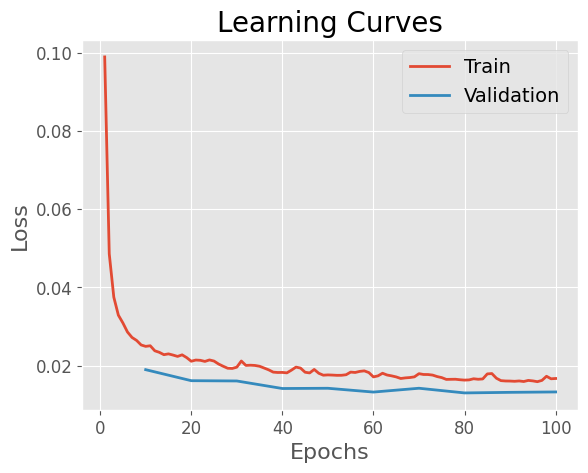

In [25]:
#VQVE Loss Curve
plt.style.use("ggplot")
plt.title("Learning Curves", fontsize=20)
plt.plot(np.linspace(1, n_epochs, n_epochs), epoch_recon_loss_list, color="C0", linewidth=2.0, label="Train")
plt.plot(
    np.linspace(val_interval, n_epochs, int(n_epochs / val_interval)),
    val_recon_epoch_loss_list,
    color="C1",
    linewidth=2.0,
    label="Validation",
)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend(prop={"size": 14})
plt.show()

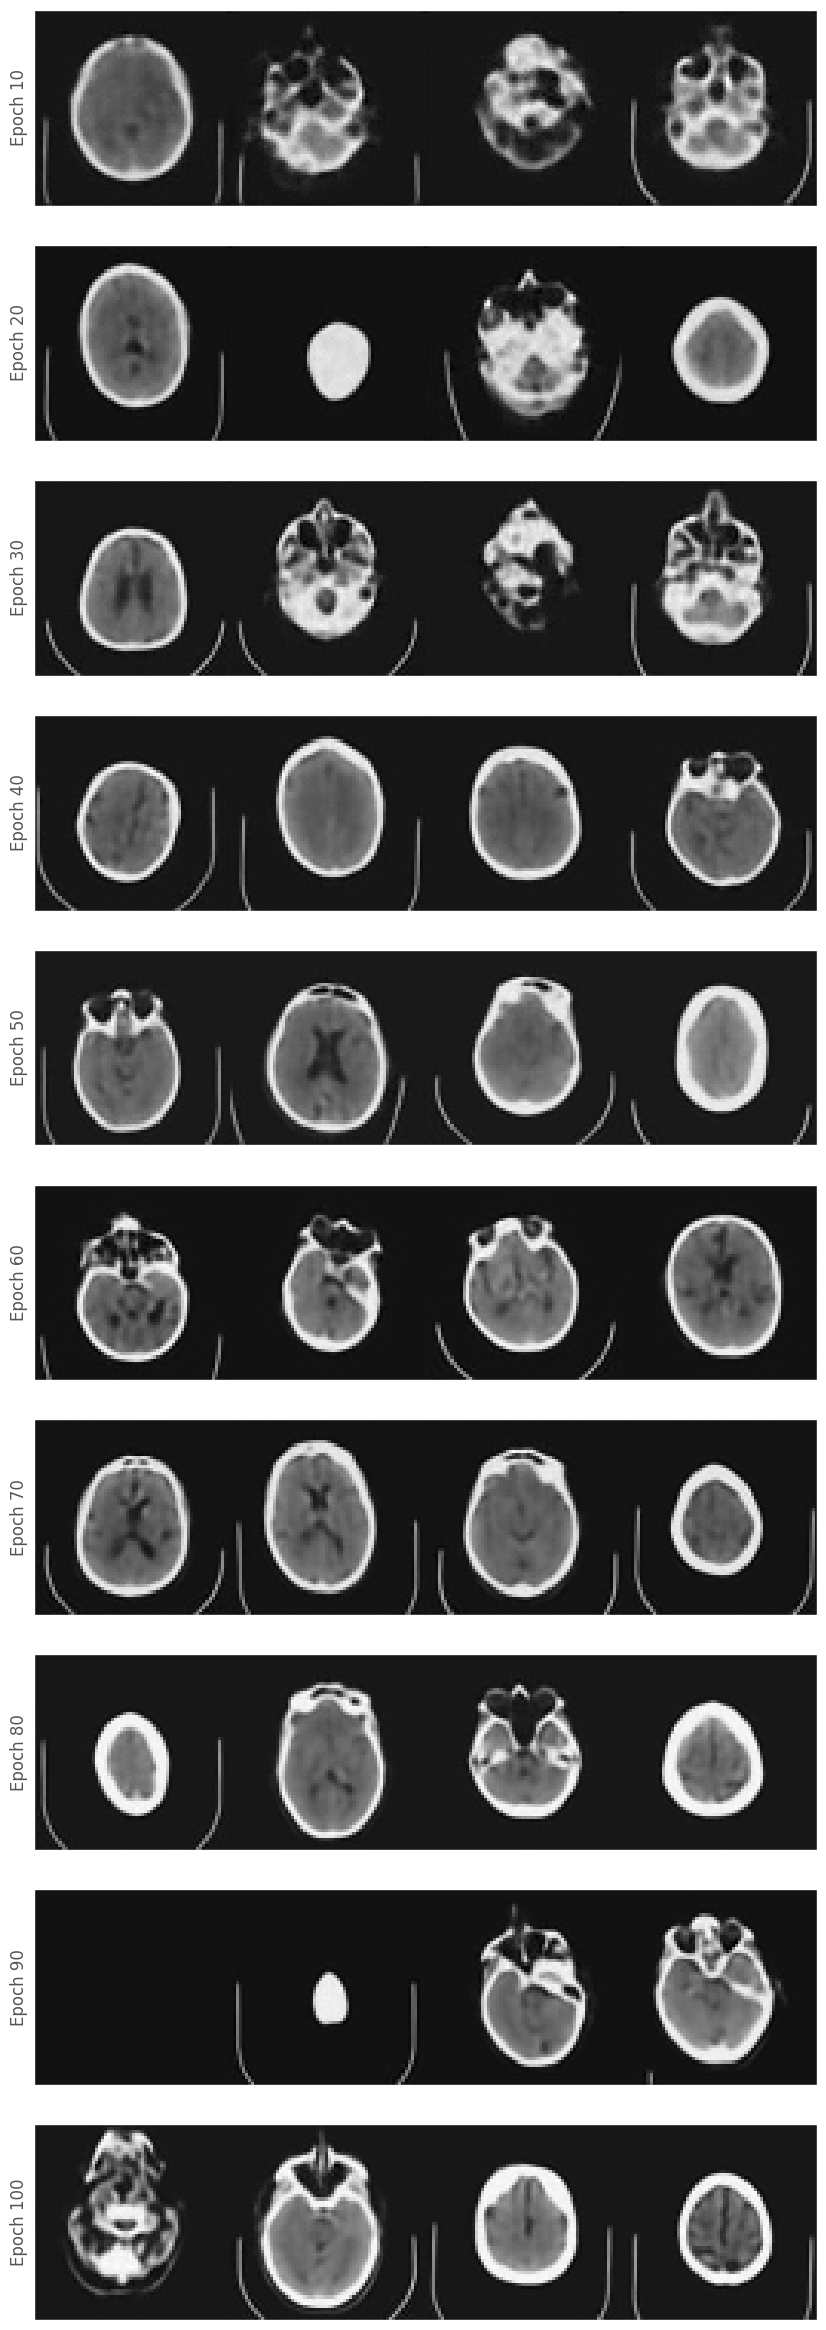

In [26]:
#Plotting evolution of reconstruction performance
# Plot every evaluation as a new line and example as columns
val_samples = np.linspace(val_interval, n_epochs, int(n_epochs / val_interval))
fig, ax = plt.subplots(nrows=len(val_samples), ncols=1, sharey=True)
fig.set_size_inches(18, 30)
for image_n in range(len(val_samples)):
    reconstructions = torch.reshape(intermediary_images[image_n], (64 * n_example_images, 64)).T
    ax[image_n].imshow(reconstructions.cpu(), cmap="gray")
    ax[image_n].set_xticks([])
    ax[image_n].set_yticks([])
    ax[image_n].set_ylabel(f"Epoch {val_samples[image_n]:.0f}")

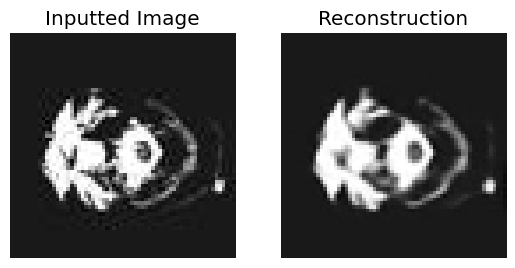

In [27]:
#Plot reconstructions of final trained vqvae model
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(images[0, 0].detach().cpu(), vmin=0, vmax=1, cmap="gray")
ax[0].axis("off")
ax[0].title.set_text("Inputted Image")
ax[1].imshow(reconstruction[0, 0].detach().cpu(), vmin=0, vmax=1, cmap="gray")
ax[1].axis("off")
ax[1].title.set_text("Reconstruction")
plt.show()

**Transformer Training**

In [28]:
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=4, persistent_workers=True)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=True, num_workers=4, persistent_workers=True)

In [29]:
# Get spatial dimensions of encoded data
test_scan = next(iter(train_loader))["image"].to(device)
spatial_shape = vqvae_model.encode_stage_2_inputs(test_scan).shape[2:]

ordering = Ordering(ordering_type=OrderingType.RASTER_SCAN.value, spatial_dims=2, dimensions=(1,) + spatial_shape)

In [30]:
bos_token = 256

In [31]:
#Define Network, optimizer and losses
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transformer_model = DecoderOnlyTransformer(
    num_tokens=256 + 1,  # 256 from num_embeddings input of VQVAE + 1 for Begin of Sentence (BOS) token
    max_seq_len=spatial_shape[0] * spatial_shape[1],
    attn_layers_dim=96,
    attn_layers_depth=12,
    attn_layers_heads=8,
)
transformer_model = transformer_model.to(device)

inferer = VQVAETransformerInferer()

In [32]:
optimizer = torch.optim.Adam(params=transformer_model.parameters(), lr=5e-4)
ce_loss = CrossEntropyLoss()

In [33]:
#Transformer Model Training
n_epochs = 50
val_interval = 10
epoch_ce_loss_list = []
val_ce_epoch_loss_list = []
intermediary_images = []
vqvae_model.eval()

total_start = time.time()
for epoch in range(n_epochs):
    transformer_model.train()
    epoch_loss = 0
    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), ncols=110)
    progress_bar.set_description(f"Epoch {epoch}")
    for step, batch in progress_bar:
        images = batch["image"].to(device)

        optimizer.zero_grad(set_to_none=True)

        logits, target, _ = inferer(images, vqvae_model, transformer_model, ordering, return_latent=True)
        logits = logits.transpose(1, 2)

        loss = ce_loss(logits, target)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        progress_bar.set_postfix({"ce_loss": epoch_loss / (step + 1)})
    epoch_ce_loss_list.append(epoch_loss / (step + 1))

    if (epoch + 1) % val_interval == 0:
        transformer_model.eval()
        val_loss = 0
        with torch.no_grad():
            for val_step, batch in enumerate(val_loader, start=1):
                images = batch["image"].to(device)
                logits, quantizations_target, _ = inferer(
                    images, vqvae_model, transformer_model, ordering, return_latent=True
                )
                logits = logits.transpose(1, 2)

                loss = ce_loss(logits, quantizations_target)

                # Generate a random sample to visualise progress
                if val_step == 1:
                    sample = inferer.sample(
                        vqvae_model=vqvae_model,
                        transformer_model=transformer_model,
                        ordering=ordering,
                        latent_spatial_dim=(spatial_shape[0], spatial_shape[1]),
                        starting_tokens=vqvae_model.num_embeddings * torch.ones((1, 1), device=device),
                    )
                    intermediary_images.append(sample[:, 0])

                val_loss += loss.item()

        val_loss /= val_step
        val_ce_epoch_loss_list.append(val_loss)

total_time = time.time() - total_start
print(f"train completed, total time: {total_time}.")

100%|██████████| 256/256 [00:02<00:00, 96.48it/s]


train completed, total time: 2546.1475484371185.


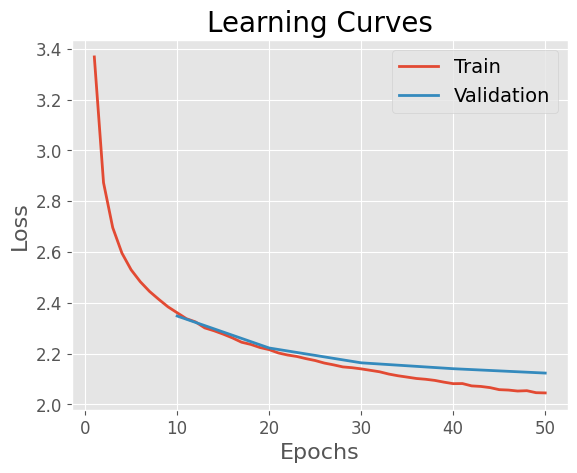

In [34]:
#Transformer Loss Curve
plt.style.use("ggplot")
plt.title("Learning Curves", fontsize=20)
plt.plot(np.linspace(1, n_epochs, n_epochs), epoch_ce_loss_list, color="C0", linewidth=2.0, label="Train")
plt.plot(
    np.linspace(val_interval, n_epochs, int(n_epochs / val_interval)),
    val_ce_epoch_loss_list,
    color="C1",
    linewidth=2.0,
    label="Validation",
)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.xlabel("Epochs", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.legend(prop={"size": 14})
plt.show()

5


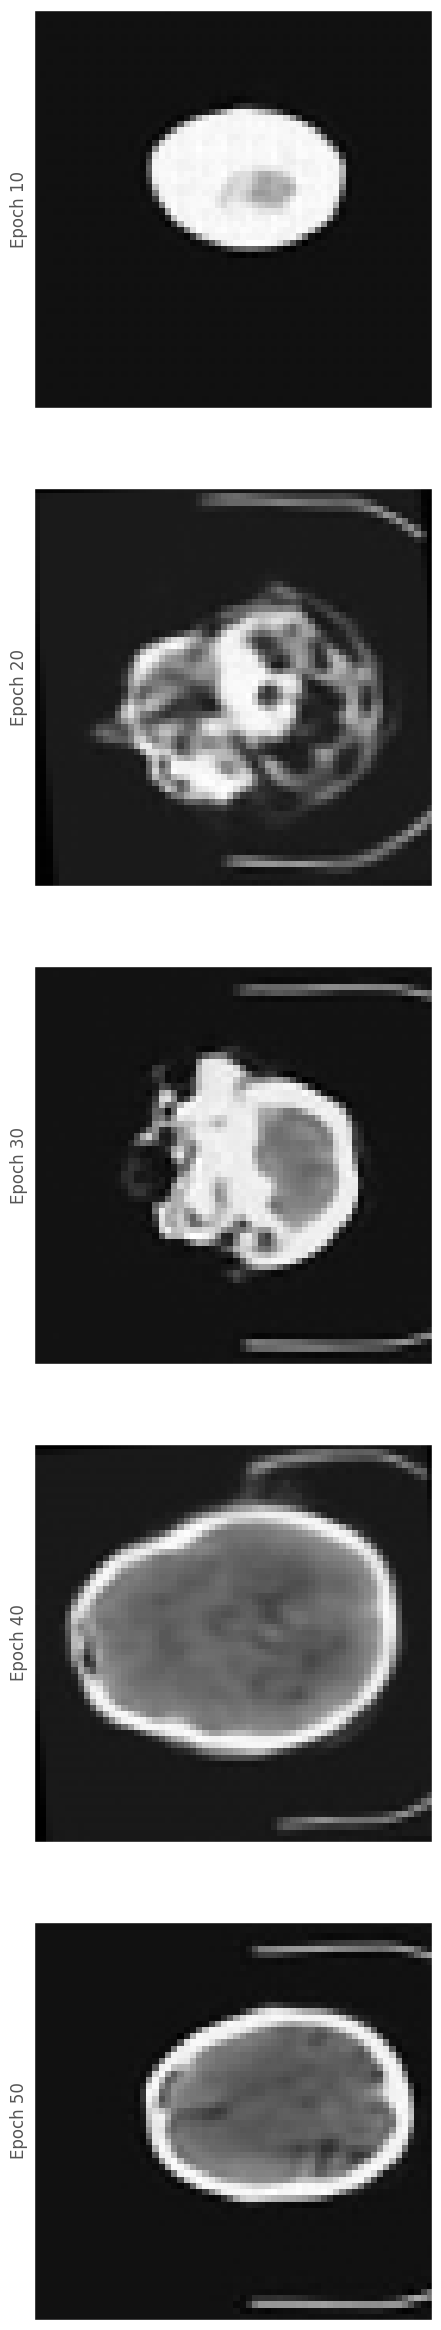

In [35]:
#Plot evoluation of Generated Samples
# Plot every evaluation as a new line and example as columns
val_samples = np.linspace(val_interval, n_epochs, int(n_epochs / val_interval))
print(len(val_samples))
fig, ax = plt.subplots(nrows=len(val_samples), ncols=1, sharey=True)
fig.set_size_inches(12, 30)
for image_n in range(len(val_samples)):
    reconstructions = intermediary_images[image_n][0]
    ax[image_n].imshow(reconstructions.cpu(), cmap="gray")
    ax[image_n].set_xticks([])
    ax[image_n].set_yticks([])
    ax[image_n].set_ylabel(f"Epoch {val_samples[image_n]:.0f}")

In [36]:
#Generating samples from the trained model
samples = []
for i in range(5):
    sample = inferer.sample(
        vqvae_model=vqvae_model,
        transformer_model=transformer_model,
        ordering=ordering,
        latent_spatial_dim=(spatial_shape[0], spatial_shape[1]),
        starting_tokens=vqvae_model.num_embeddings * torch.ones((1, 1), device=device),
    )
    samples.append(sample[:, 0])

100%|██████████| 256/256 [00:02<00:00, 95.77it/s]


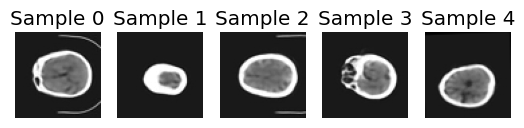

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=5)
for i in range(5):
    ax[i].imshow(samples[i][0].detach().cpu(), vmin=0, vmax=1, cmap="gray")
    ax[i].axis("off")
    ax[i].title.set_text("Sample " + str(i))
plt.show()

In [39]:
#Cleanup data directory
if directory is None:
    shutil.rmtree(root_dir)